In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

# Adicionar o diretório atual ao path (se necessário)
sys.path.append('.')

# Importar sua classe principal
from stock_prediction import StockPredictor  # Ajuste o nome do arquivo conforme necessário

# Configurar matplotlib
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

In [2]:
print("Executando predição...")
predictor = StockPredictor(stock='MSFT', period='24mo', forecast_days=22)
future_df, test_predictions, y_test = predictor.run_prediction()

Executando predição...
Baixando dados da MSFT...


c:\Users\Brian\Desktop\stock_market_project\scripts\DL_stock_class.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.raw_data = yf.download([self.stock], period=self.period)
[*********************100%***********************]  1 of 1 completed

Construindo modelo LSTM...
Treinando modelo...
Epoch 1/100



c:\Users\Brian\Desktop\stock_market_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1776
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0036
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034
E

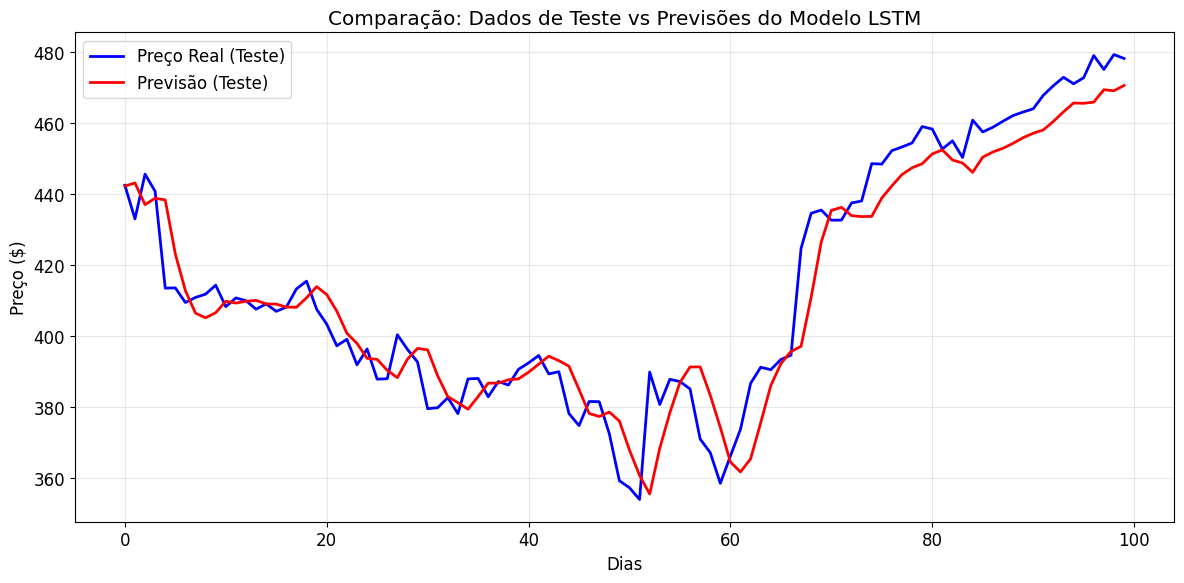

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Preço Real (Teste)', color='blue', linewidth=2)
plt.plot(test_predictions, label='Previsão (Teste)', color='red', linewidth=2)
plt.title('Comparação: Dados de Teste vs Previsões do Modelo LSTM')
plt.xlabel('Dias')
plt.ylabel('Preço ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

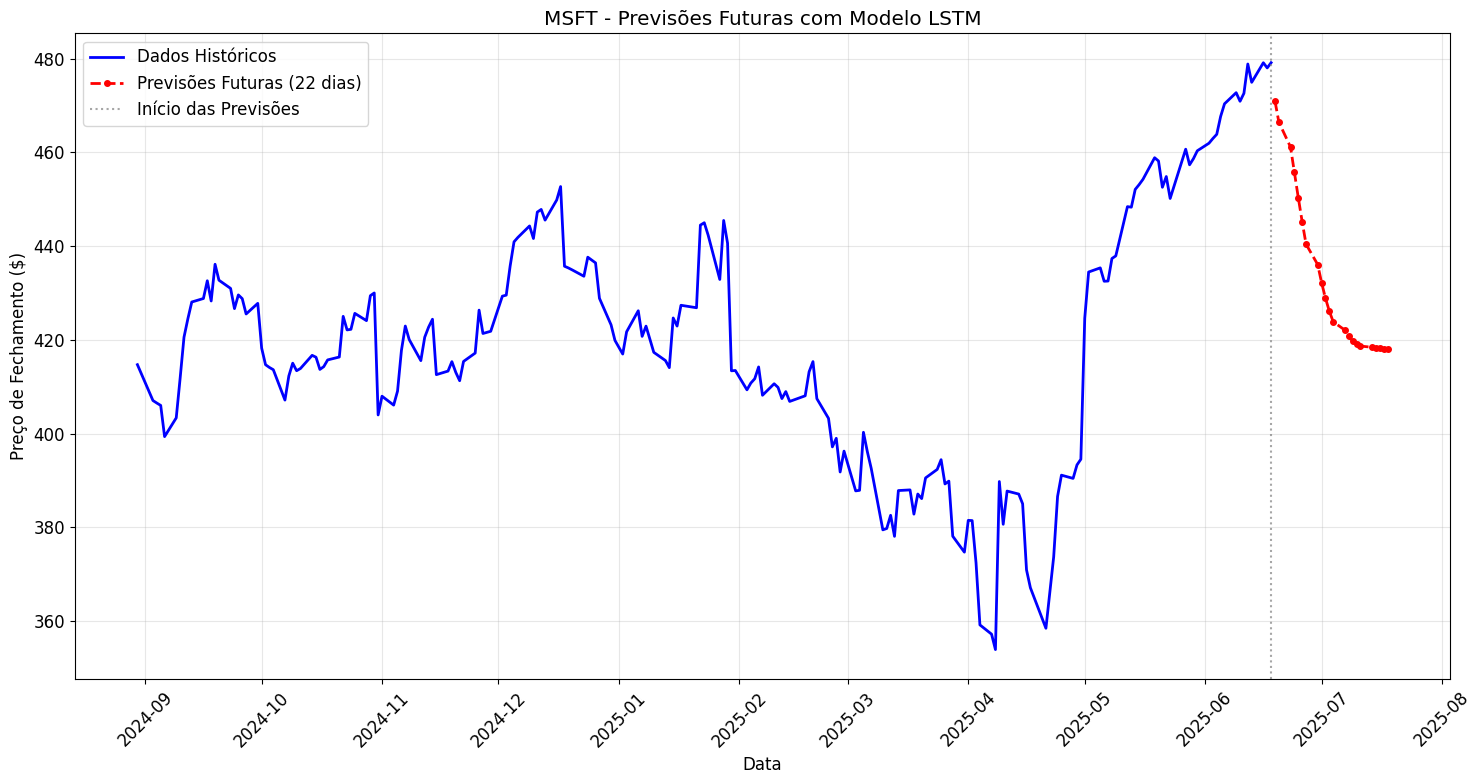

In [5]:
plt.figure(figsize=(15, 8))

# Extrair dados necessários
scaler = predictor.scaler
scaled_data = predictor.scaled_data
raw_data = predictor.raw_data

# Últimos 200 dias dos dados reais
recent_data = scaler.inverse_transform(scaled_data[-200:])
recent_dates = raw_data.index[-200:]

# Dados de previsão futura
future_predictions = future_df['Previsao_Close'].values
future_dates = pd.to_datetime(future_df['Data'])

# Plotar
plt.plot(recent_dates, recent_data, label='Dados Históricos', 
         color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, 
         label=f'Previsões Futuras ({len(future_predictions)} dias)', 
         color='red', linewidth=2, linestyle='--', marker='o', markersize=4)

# Linha divisória
plt.axvline(x=recent_dates[-1], color='gray', linestyle=':', alpha=0.7, 
           label='Início das Previsões')

plt.title('MSFT - Previsões Futuras com Modelo LSTM')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

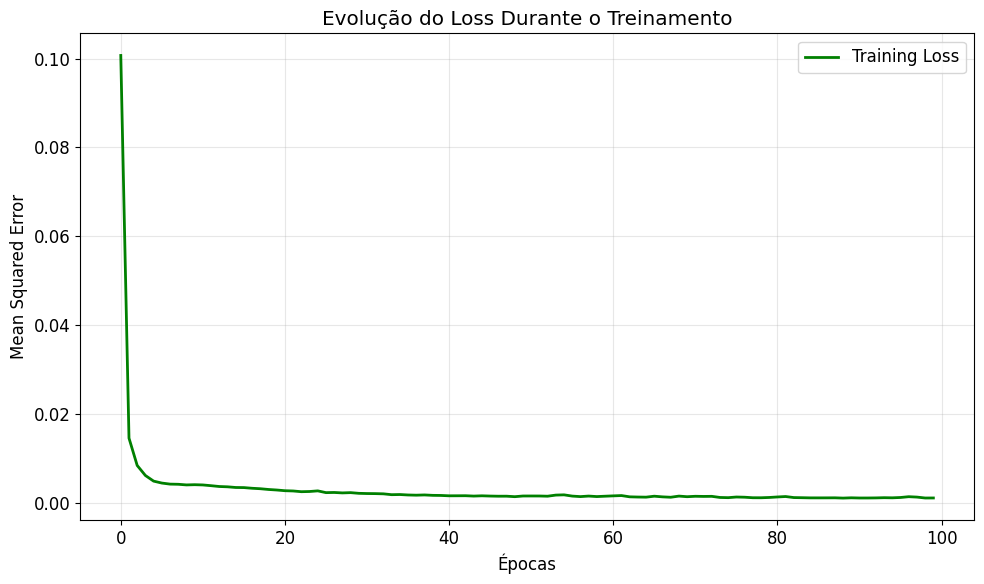

In [6]:
if predictor.lstm_model.history is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(predictor.lstm_model.history.history['loss'], 
             label='Training Loss', color='green', linewidth=2)
    plt.title('Evolução do Loss Durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [10]:
# Calcular métricas de erro
errors = y_test.flatten() - test_predictions.flatten()
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print(f"\n📊 MÉTRICAS DE PERFORMANCE:")
print(f"MAE (Mean Absolute Error): ${mae:.2f}")
print(f"MSE (Mean Squared Error): ${mse:.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}")


📊 MÉTRICAS DE PERFORMANCE:
MAE (Mean Absolute Error): $7.49
MSE (Mean Squared Error): $95.36
RMSE (Root Mean Squared Error): $9.77


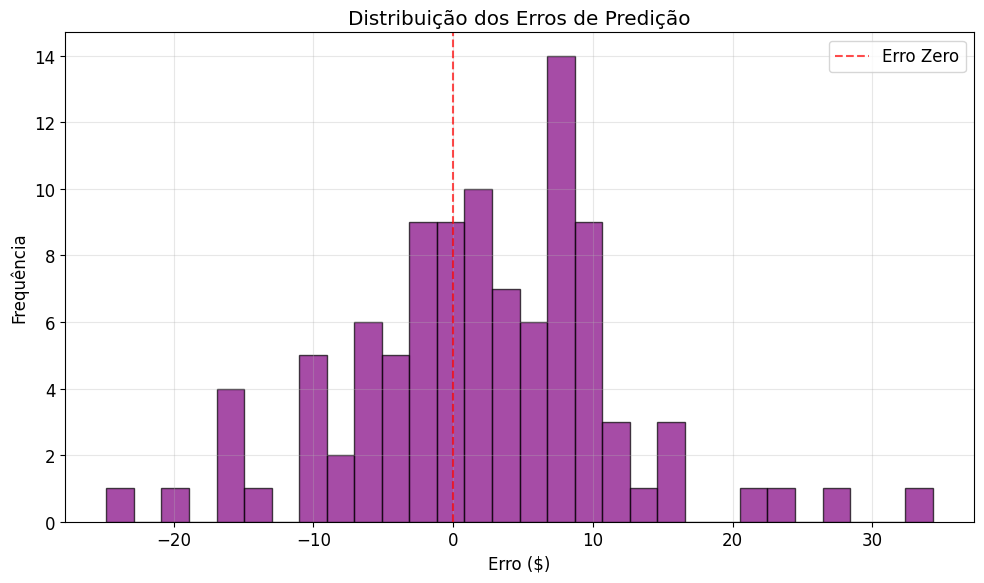

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Erro Zero')
plt.title('Distribuição dos Erros de Predição')
plt.xlabel('Erro ($)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
print("\n📈 PREVISÕES FUTURAS:")
print(future_df.to_string(index=False))



📈 PREVISÕES FUTURAS:
      Data  Previsao_Close
2025-06-19      470.961548
2025-06-20      466.453979
2025-06-23      461.158173
2025-06-24      455.730377
2025-06-25      450.364227
2025-06-26      445.226288
2025-06-27      440.426727
2025-06-30      436.072815
2025-07-01      432.221466
2025-07-02      428.903748
2025-07-03      426.124268
2025-07-04      423.865692
2025-07-07      422.091888
2025-07-08      420.748871
2025-07-09      419.776733
2025-07-10      419.109009
2025-07-11      418.682465
2025-07-14      418.427521
2025-07-15      418.275787
2025-07-16      418.181976
2025-07-17      418.088684
2025-07-18      417.962769


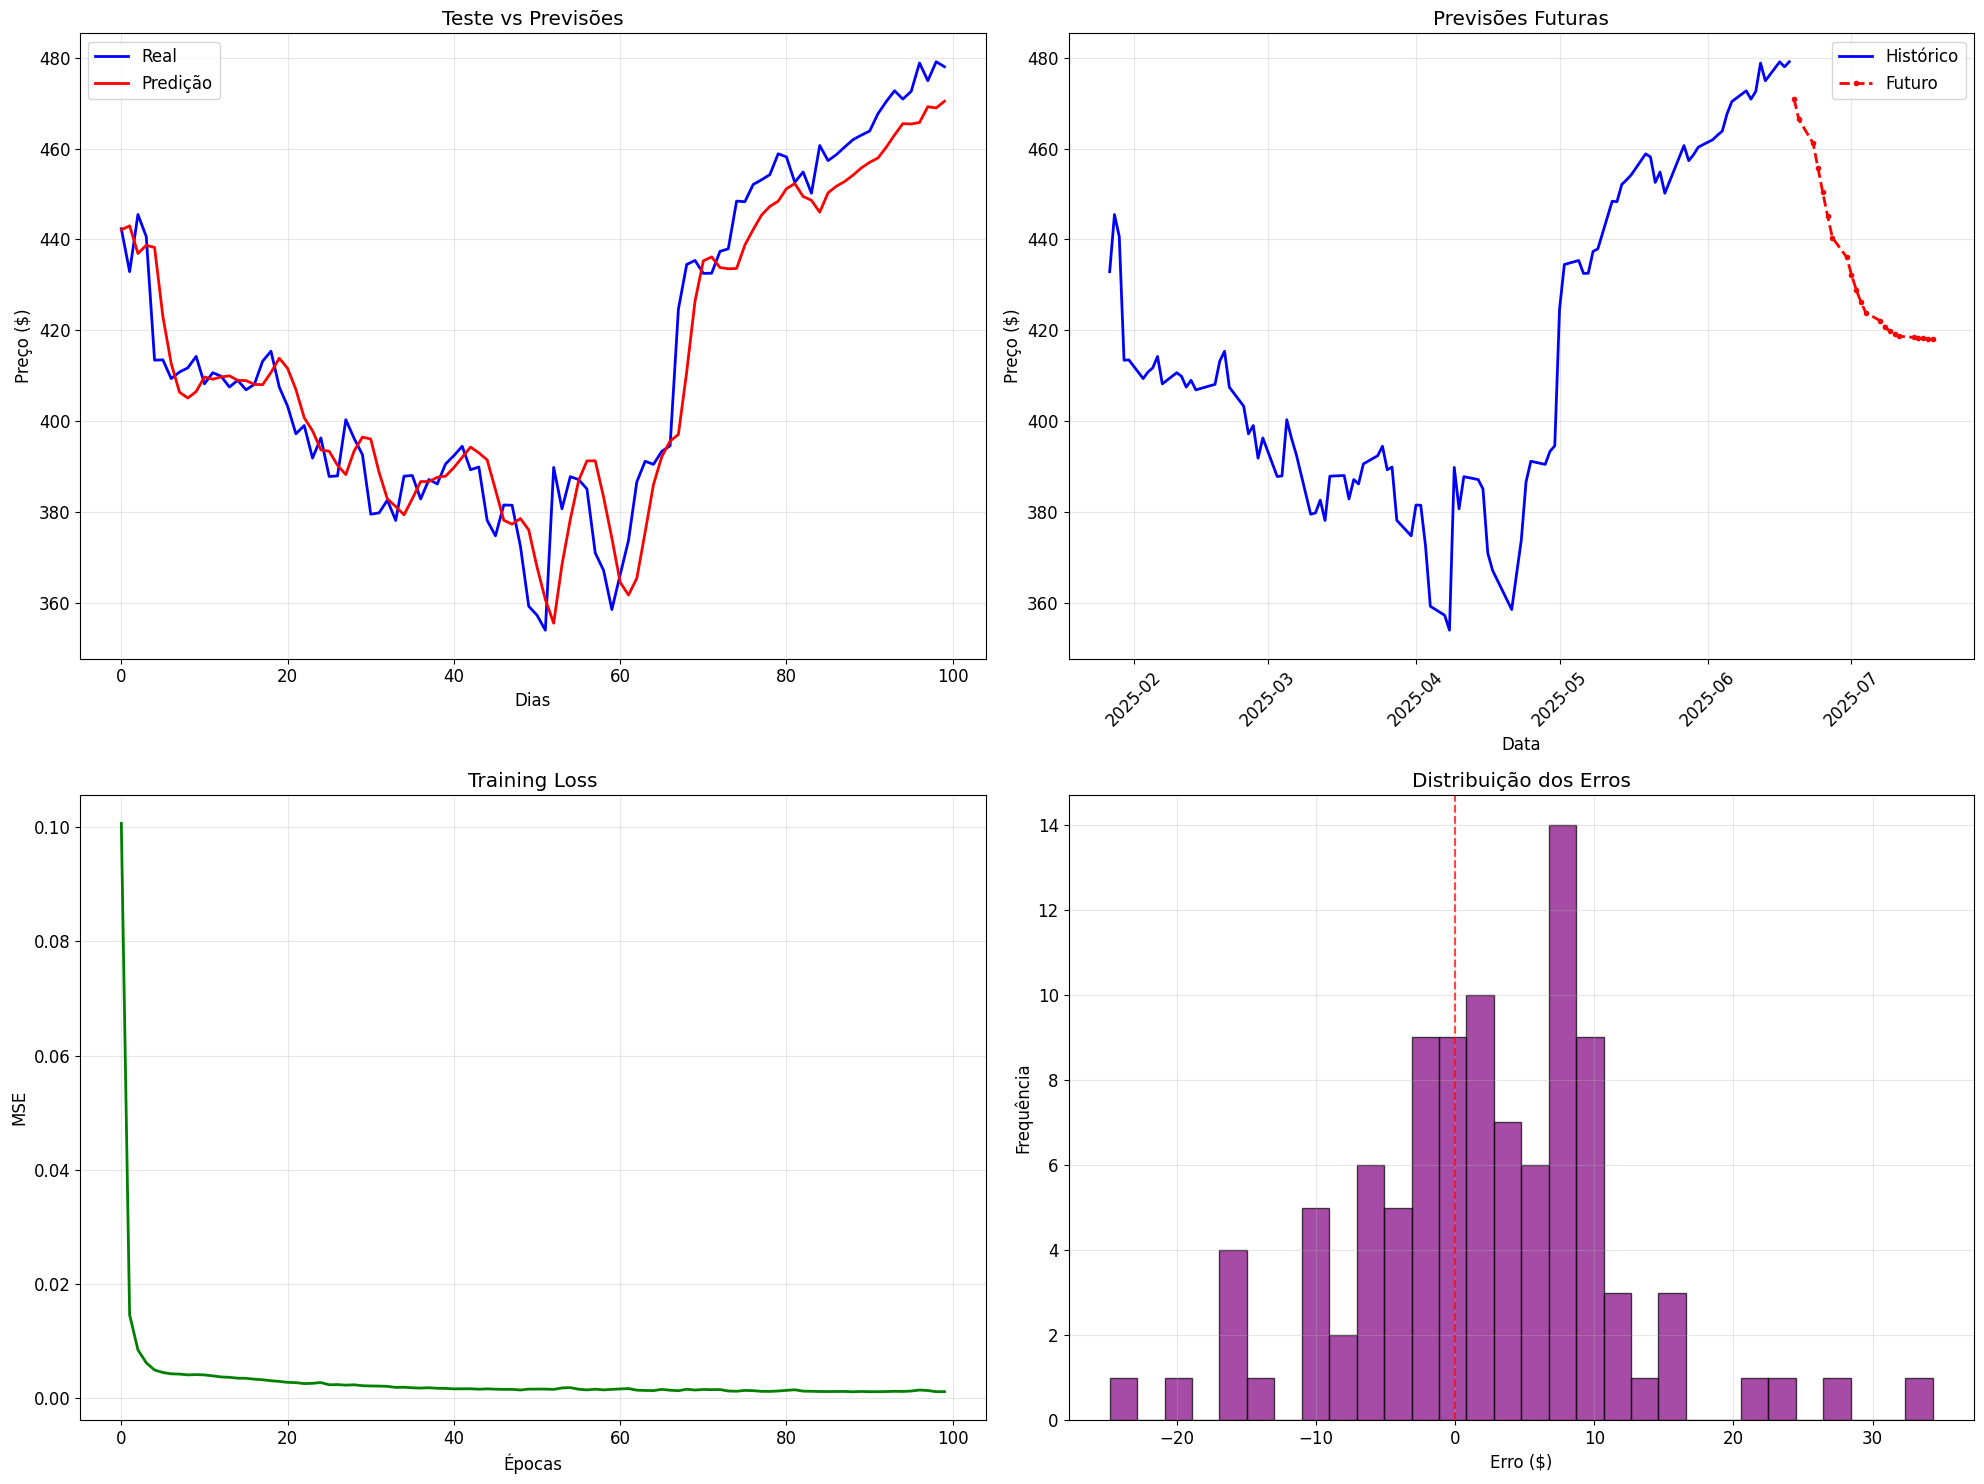

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Subplot 1: Teste vs Previsão
ax1.plot(y_test, label='Real', color='blue', linewidth=2)
ax1.plot(test_predictions, label='Predição', color='red', linewidth=2)
ax1.set_title('Teste vs Previsões')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Preço ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Histórico + Futuro
ax2.plot(recent_dates[-100:], recent_data[-100:], label='Histórico', color='blue', linewidth=2)
ax2.plot(future_dates, future_predictions, label='Futuro', 
         color='red', linewidth=2, linestyle='--', marker='o', markersize=3)
ax2.set_title('Previsões Futuras')
ax2.set_xlabel('Data')
ax2.set_ylabel('Preço ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Subplot 3: Training Loss
if predictor.lstm_model.history is not None:
    ax3.plot(predictor.lstm_model.history.history['loss'], color='green', linewidth=2)
    ax3.set_title('Training Loss')
    ax3.set_xlabel('Épocas')
    ax3.set_ylabel('MSE')
    ax3.grid(True, alpha=0.3)

# Subplot 4: Distribuição dos Erros
ax4.hist(errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.7)
ax4.set_title('Distribuição dos Erros')
ax4.set_xlabel('Erro ($)')
ax4.set_ylabel('Frequência')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()